# Time Series Decomposition & Forecasting

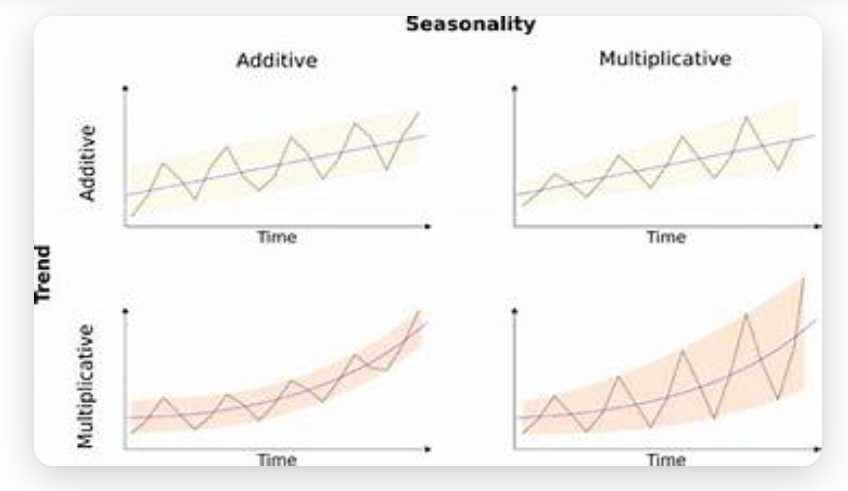

# Time Series Decomposition

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step 1: Read the data

In [2]:
import pandas as pd
df = pd.read_csv('AirPassengers.csv', index_col='Month')
# added 'index_col' as our dataset has date column and if we dont add this then the df will consdier it is as 'object' i.e. string data type 
# read the dataset without adding this element to check the data type of the date column that it will be considered as 'object' datatype
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


#### Convert the Month to datetime Format

In [3]:
df.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Step 2: Visulaize above data

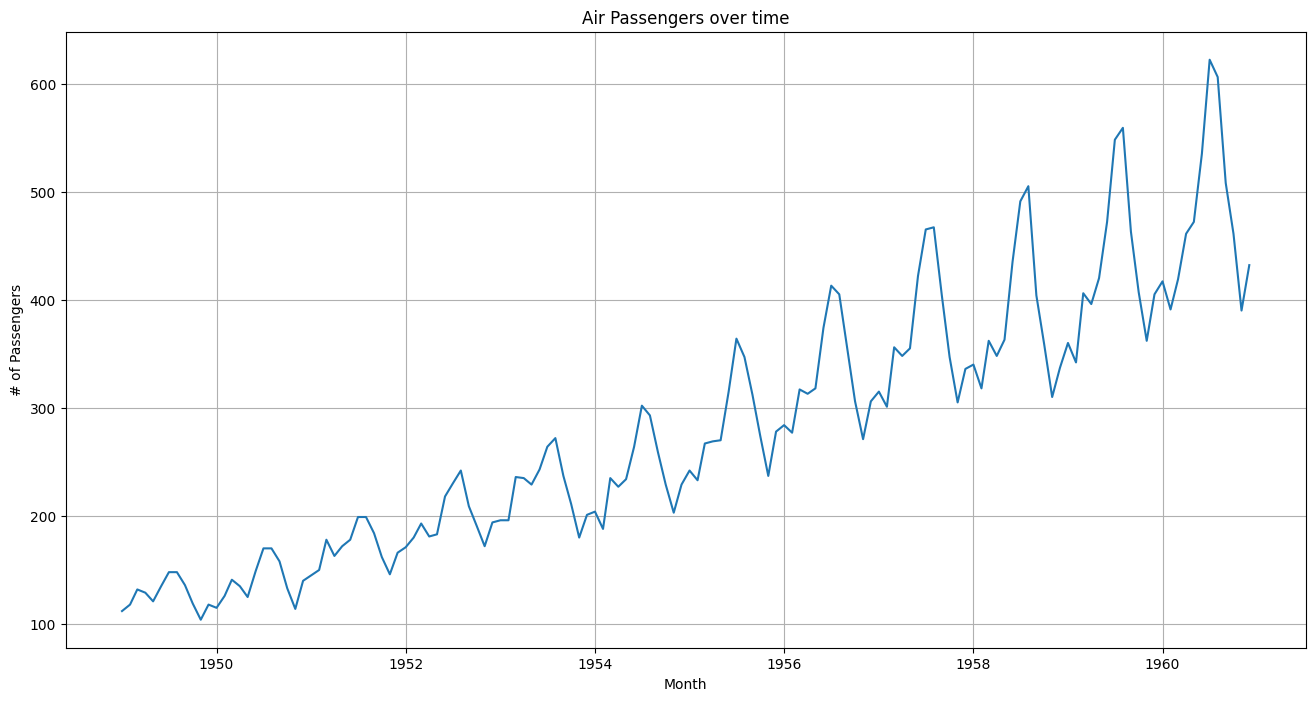

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['Passengers'])
plt.xlabel('Month')
plt.ylabel('# of Passengers')
plt.title('Air Passengers over time')
plt.grid()
plt.show()

#### CONCLUSION: Based on trend in the graph above, we can use multiplicative model to decompose the above time series data

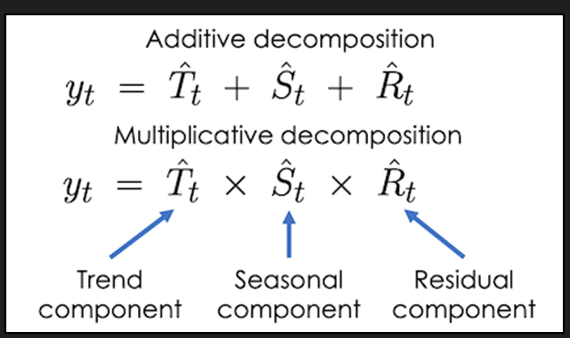

## Step 3: Time Series Decomposition

### 3(i): Convert the aboce time series data to Multiplicative Model

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

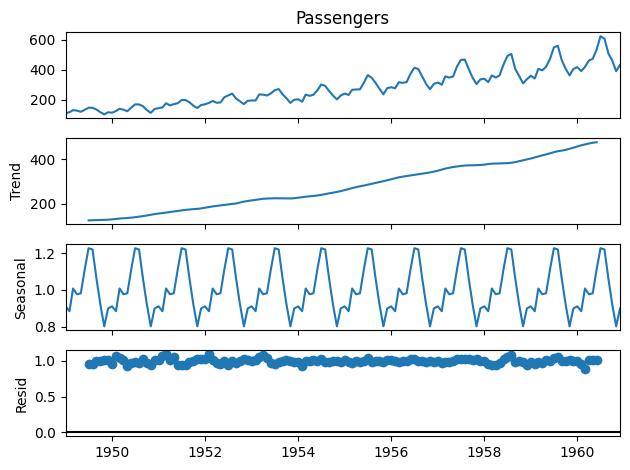

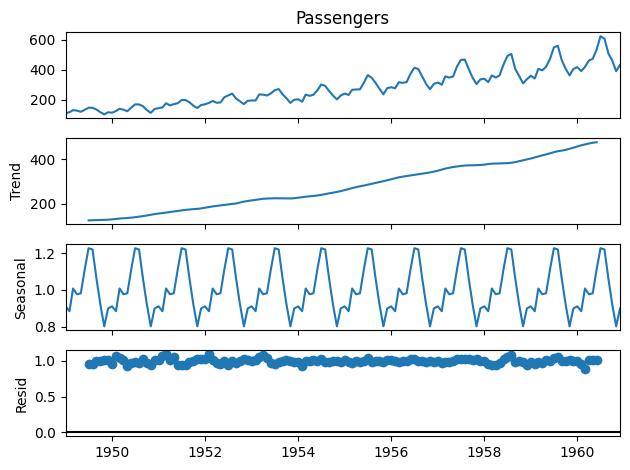

In [9]:
Q = seasonal_decompose(df['Passengers'], model='multiplicative')
Q.plot()

In [10]:
#get the Trend of the data (first & last few data points can be NaN)

Q.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [11]:
#get the Sesonality of the data (first & last few data points can be NaN)

Q.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [12]:
#get the Residual (randomness) of the data (first & last few data points can be NaN)

Q.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

In [13]:
# get the actual data

Q.observed

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Passengers, Length: 144, dtype: float64

### 3(ii) Plot Series with Trend - Trend Analysis

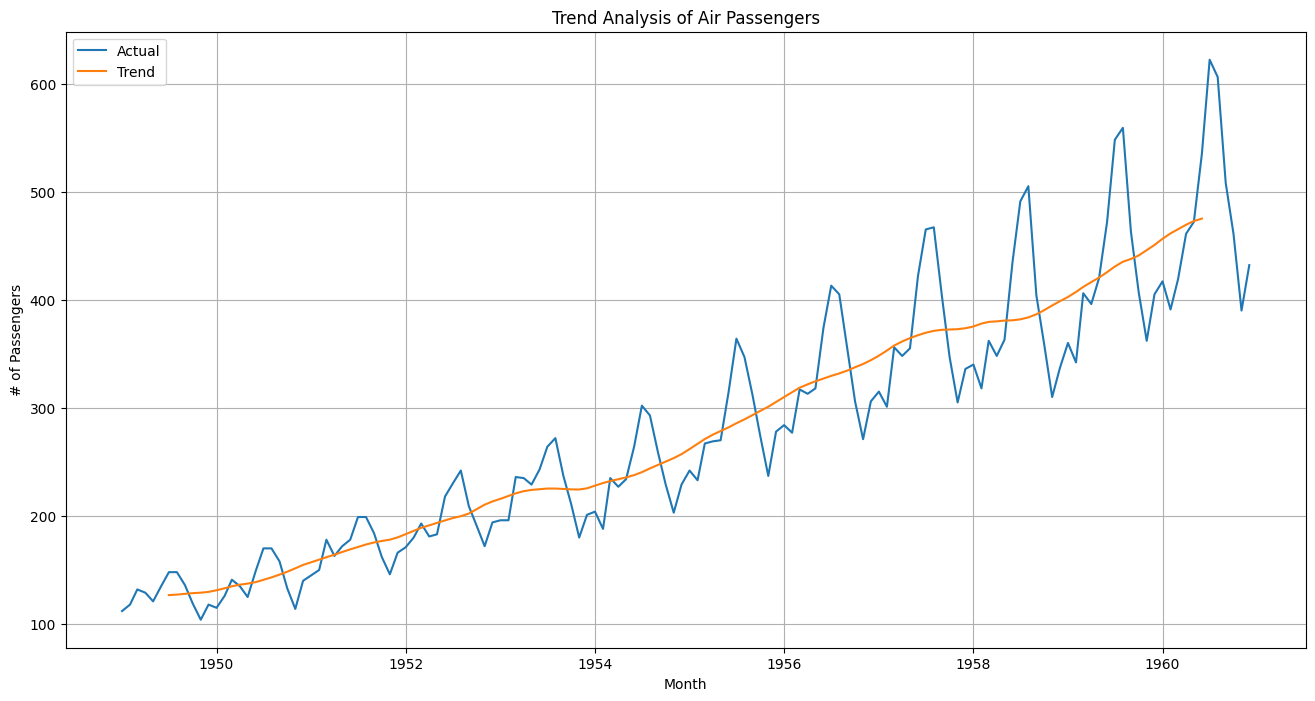

In [14]:
plt.figure(figsize=(16,8))
plt.plot(Q.observed, label='Actual')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Month')
plt.ylabel('# of Passengers')
plt.title('Trend Analysis of Air Passengers')
plt.grid()
plt.legend() # to change position of the legend, add 'loc='upper left'' inside the round brackets
plt.show()

### 3(ii): Plot the Seasonality 

#### The below code block is without considering the 'randomness0 i.e. residual component

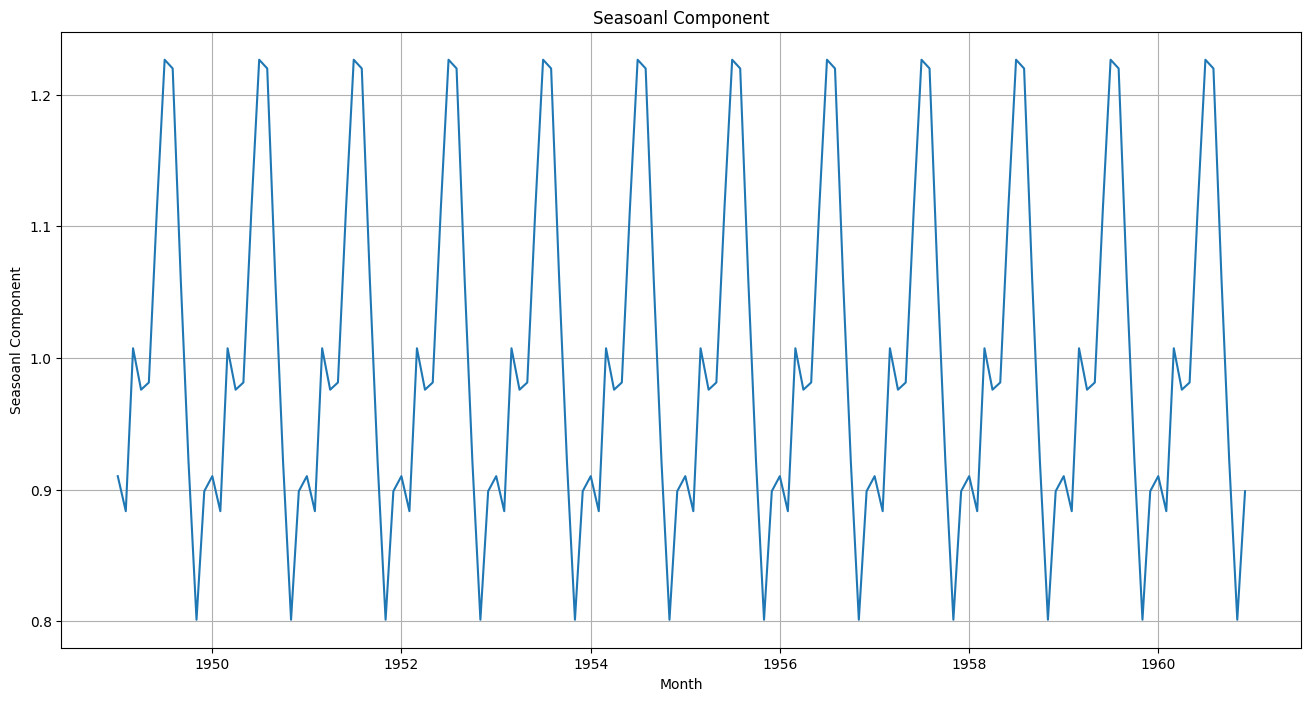

In [15]:
plt.figure(figsize=(16,8))
plt.plot(Q.seasonal)
plt.xlabel('Month')
plt.ylabel('Seasoanl Component')
plt.title('Seasoanl Component')
plt.grid()
plt.show()

### 3(iii): Plot the Residulas (randomness)

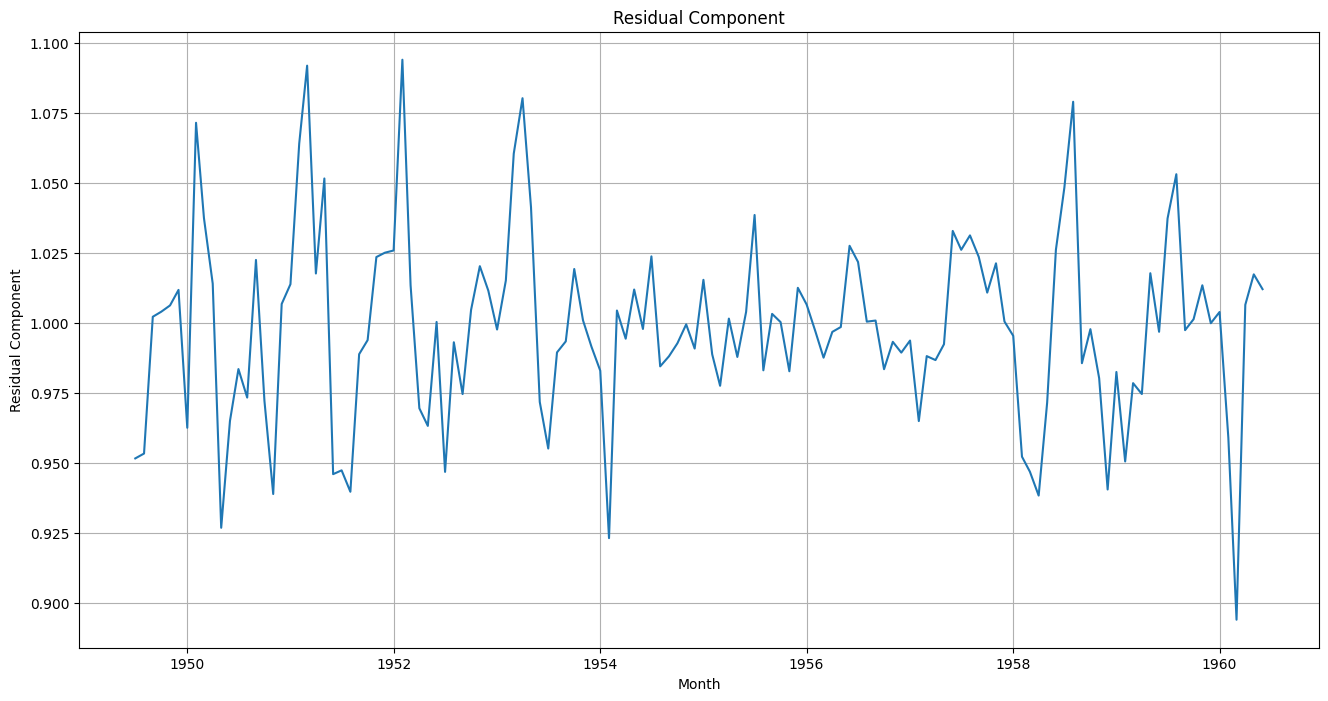

In [16]:
plt.figure(figsize=(16,8))
plt.plot(Q.resid)
plt.xlabel('Month')
plt.ylabel('Residual Component')
plt.title('Residual Component')
plt.grid()
plt.show()

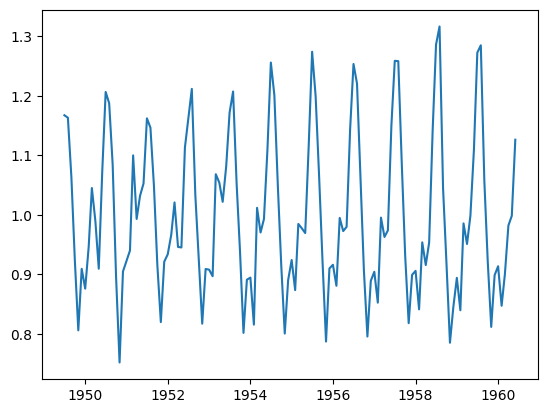

In [17]:
# Sesonality with Random for Multiplicative Model --> calculation
plt.plot(Q.observed/Q.trend)

# Time Series Forecasting

## ARIMA used for both Additive & Multiplicative models

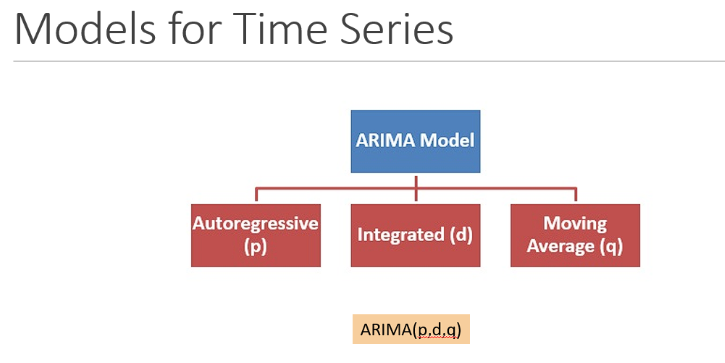

In [18]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


## Step 4: Buliding Model for Time Series Forecasting

In [20]:
from pmdarima.arima import auto_arima

In [22]:
model = auto_arima(df['Passengers'], seasonal=True, m=12)

#### 1. add 'seasonal=True' to consider the seasonality in forecasting
#### 2. in the above 'm=12' is basically taking once cycle duration based on your tracking data of your time series data

if your data is in:
1. Minutes --> m=60 --> i.e. 1 hour
2. Hourly --> m=24 --> i.e. 1 day
3. Daily --> m=30 --> i.e. 1 month
4. Monthly --> m=12 --> i.e. 1 year
5. Yearly --> m=5 --> i.e. 5 years

In [24]:
model.order #gives p,d,q values

(2, 1, 1)

In [23]:
p, d, q = model.order

In [25]:
p

2

In [26]:
d

1

In [27]:
q

1

## Step 5: Forecast next 3 years data using above model

#### 3 years --> 3*12 --> 36 months

In [28]:
forecast, conf = model.predict(n_periods=36, return_conf_int=True)
# n_periods --> give the value for the period you want to forecast based on the data points you have in your actual data.
# here we have monthly data so converting it into months i.e. 36
# return_conf_int=True --> get results with confidence interval

#### forecast --> gives avg. forecast
#### conf --> gives highest & lowest predicted value of the date point

In [34]:
forecast.head()

1961-01-01    445.634934
1961-02-01    420.395042
1961-03-01    449.198378
1961-04-01    491.840023
1961-05-01    503.394565
Freq: MS, dtype: float64

In [33]:
conf[0:5]

array([[423.34475094, 467.92511658],
       [394.23518302, 446.55490116],
       [419.83140846, 478.56534829],
       [460.37587373, 523.30417201],
       [470.37999658, 536.40913406]])

### 5(i) Save above results to DF

In [35]:
df_forecast = forecast.to_frame()
df_forecast.columns = ['forecast']
df_forecast.head()

,forecast
1961-01-01,445.634934
1961-02-01,420.395042
1961-03-01,449.198378
1961-04-01,491.840023
1961-05-01,503.394565


In [36]:
df_forecast[['Lower','Upper']] = conf
df_forecast.head()

,forecast,Lower,Upper
1961-01-01,445.634934,423.344751,467.925117
1961-02-01,420.395042,394.235183,446.554901
1961-03-01,449.198378,419.831408,478.565348
1961-04-01,491.840023,460.375874,523.304172
1961-05-01,503.394565,470.379997,536.409134


#### Rounding the values in the df as the forecasted data is # of passengers which cannot be in decimals 

In [37]:
df_forecast = df_forecast.apply(round)
df_forecast.head()

,forecast,Lower,Upper
1961-01-01,446.0,423.0,468.0
1961-02-01,420.0,394.0,447.0
1961-03-01,449.0,420.0,479.0
1961-04-01,492.0,460.0,523.0
1961-05-01,503.0,470.0,536.0


## Step 6: Save above df to csv

In [38]:
df_forecast.to_csv('Forecast.csv')
# we are not removing index as it has the 'Month' data in it.

## Step 7: Plot the forecasted data

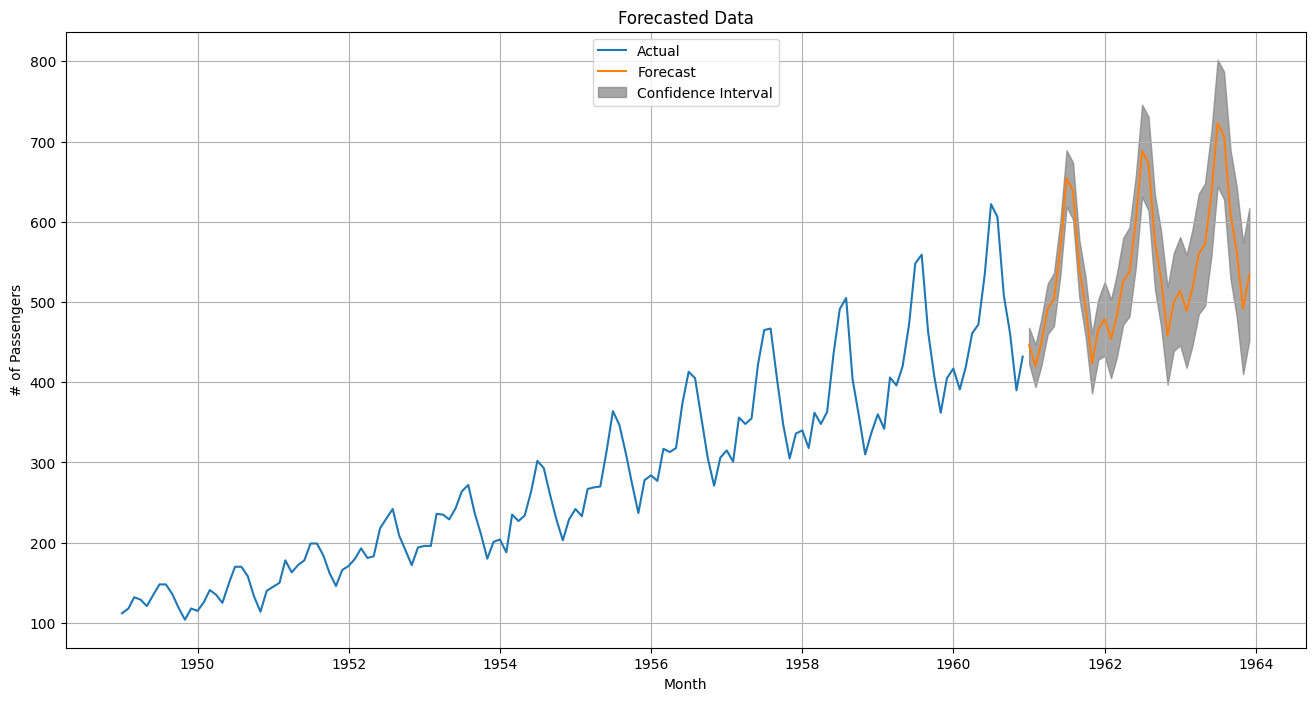

In [41]:
plt.figure(figsize=(16,8))
plt.plot(df['Passengers'], label='Actual')
plt.plot(df_forecast['forecast'], label='Forecast')
plt.fill_between(df_forecast.index,
                 df_forecast['Lower'], df_forecast['Upper'],
                 alpha=0.7, color='gray',
                 label='Confidence Interval')
plt.xlabel('Month')
plt.ylabel('# of Passengers')
plt.title('Forecasted Data')
plt.grid()
plt.legend(loc='upper center')
plt.show()

## Step 8: Push the files to github

### SAVE ALL before oushing the files
1. git add .
2. git commit -m "Class 27 - 14.04 - Time Series Decomposition & Forecasting"
3. git push -u origin main